In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

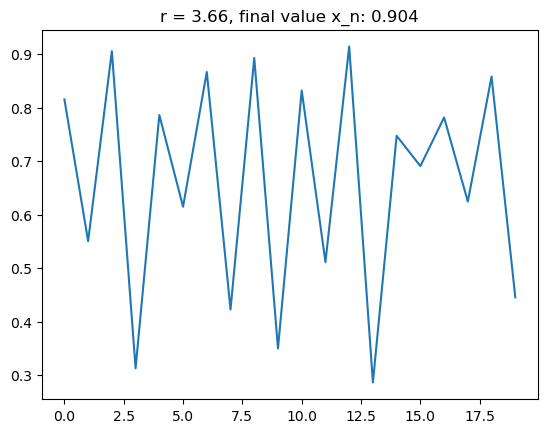

In [7]:
def f(x, r):
    return r * x * (1 - x)

r = 3.66
sequence = []
N = 20
x0 = 0.01

for _ in range(100):
    x0 = f(x0, r)

for _ in range(20):
    sequence.append(x0)
    x0 = f(x0, r)
    
plt.plot(sequence)
plt.title(f"r = {r}, final value x_n: {np.round(x0, 3)}")
#plt.text(30, 0.1, f"Final value: x_n = {np.round(sequence[-1], 4)}")
plt.show()

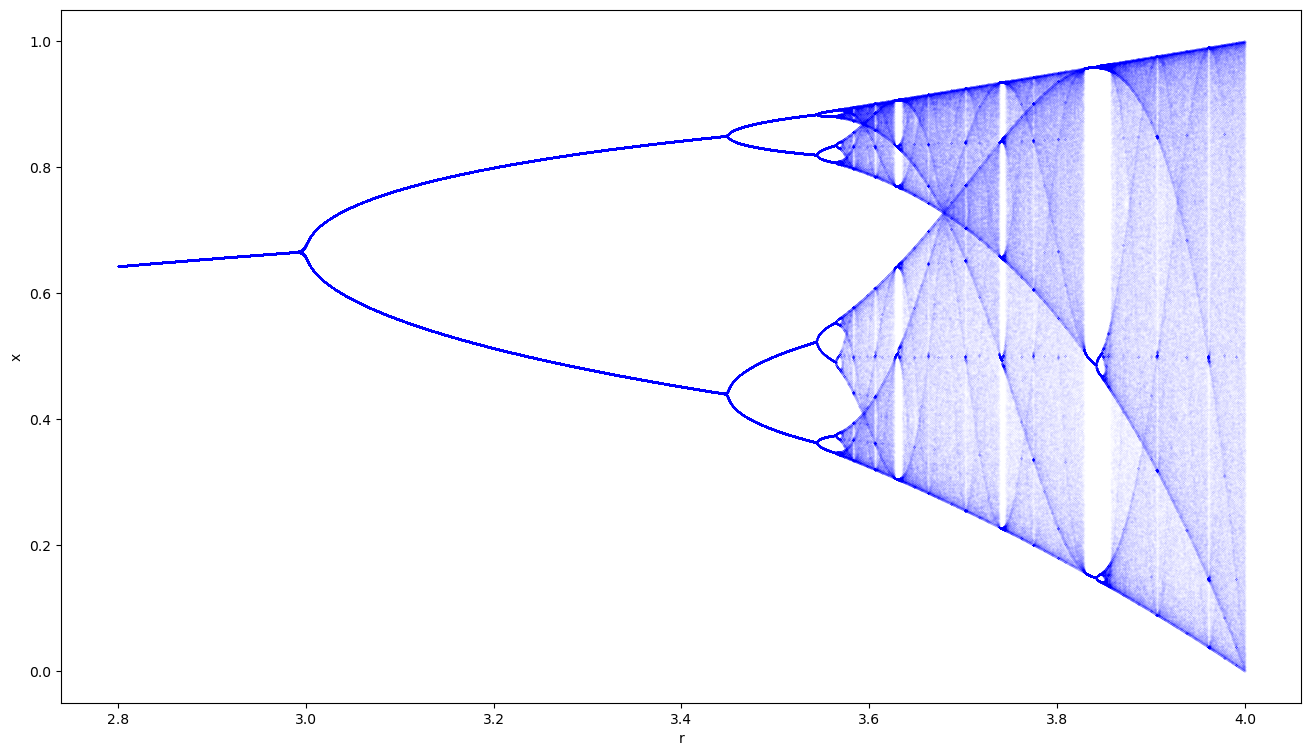

In [9]:
interval = (2.8, 4)  # start, end
accuracy = 0.0001
reps = 600  # number of repetitions
numtoplot = 200
lims = np.zeros(reps)

fig, biax = plt.subplots()
fig.set_size_inches(16, 9)

lims[0] = np.random.rand()
for r in np.arange(interval[0], interval[1], accuracy):
    for i in range(reps - 1):
        lims[i + 1] = r * lims[i] * (1 - lims[i])

    biax.plot([r] * numtoplot, lims[reps - numtoplot :], "b.", markersize=0.02)

biax.set(xlabel="r", ylabel="x")
plt.show()

In [122]:
def truncate(dataset:pd.DataFrame, min, max):
    return dataset.truncate(min, max, axis =0)

In [123]:
dataset = pd.read_csv('data/BB_8V_90Hz.csv', delimiter="\t", usecols = np.arange(0, 5), names=["n=1", "n=2", "n=3", "n=4", "n=5"], dtype = np.float64)
dataset2 = pd.read_csv('data/BB_5V_90Hz.csv', delimiter="\t", usecols = np.arange(0, 5), names=["n=1", "n=2", "n=3", "n=4", "n=5"], dtype = np.float64)

dataset.replace(-float('inf'), 0, inplace =True)
dataset2.replace(-float('inf'), 0, inplace =True)

In [125]:
dataset_trunc = truncate(dataset, 100, 125)
dataset2_trunc = truncate(dataset2, 100, 125)

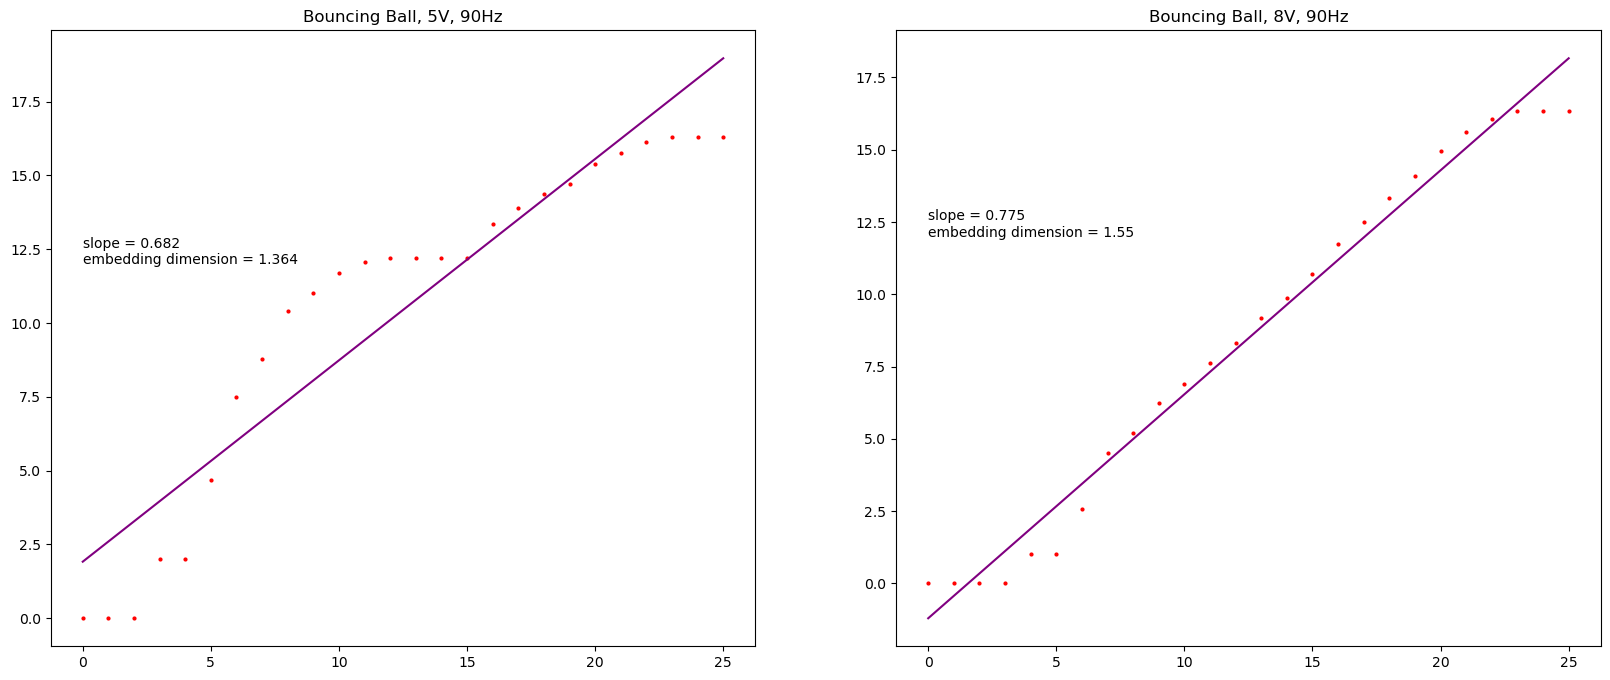

In [126]:
def linear(x, m, b):
    return m* x + b

fig, axes = plt.subplots(ncols = 2, figsize = (20, 8))

N = len(dataset2_trunc['n=5'])
fit, cov = opt.curve_fit(linear, np.arange(N), dataset2_trunc['n=5'])
m_fit, b_fit = fit
axes[0].scatter(np.arange(N), dataset2_trunc["n=5"], s = 4, c = 'red')
axes[0].plot(np.arange(N), linear(np.arange(N), m_fit, b_fit), c = 'purple')
axes[0].text(0, 12, f'slope = {np.round(m_fit, 3)}\nembedding dimension = {2 * np.round(m_fit, 3)}')
axes[0].set_title('Bouncing Ball, 5V, 90Hz')

N = len(dataset_trunc['n=5'])
fit, cov = opt.curve_fit(linear, np.arange(N), dataset_trunc['n=5'])
m_fit, b_fit = fit
axes[1].scatter(np.arange(N), dataset_trunc["n=5"], s = 4, c = 'red')
axes[1].plot(np.arange(N), linear(np.arange(N), m_fit, b_fit), c = 'purple')
axes[1].text(0, 12, f'slope = {np.round(m_fit, 3)}\nembedding dimension = {2 * np.round(m_fit, 3)}')
axes[1].set_title('Bouncing Ball, 8V, 90Hz')


plt.show()

In [127]:
dataset = pd.read_csv('data/PN_5V_3kHz.csv', delimiter="\t", usecols = np.arange(0, 5), names=["n=1", "n=2", "n=3", "n=4", "n=5"], dtype = np.float64)
dataset2 = pd.read_csv('data/PN_7V_5kHz.csv', delimiter="\t", usecols = np.arange(0, 5), names=["n=1", "n=2", "n=3", "n=4", "n=5"], dtype = np.float64)

dataset.replace(-float('inf'), 0, inplace =True)
dataset2.replace(-float('inf'), 0, inplace =True)

dataset_trunc = truncate(dataset, 107, 125)
dataset2_trunc = truncate(dataset2, 107, 125)